### Example of fitting a Gaussian process regression

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib import rc
rc('text', usetex=False)
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
#!pip install shap
import shap
from sklearn.preprocessing import MinMaxScaler
#!pip uninstall keras-nightly
from tensorflow import keras
import re
from bayes_opt import BayesianOptimization
import pickle
import tensorflow as tf
from tensorflow.keras import layers
import gpflow

ModuleNotFoundError: No module named 'gpflow'

In [2]:
import gpflow
from gpflow.utilities import positive, print_summary

plt.style.use("ggplot")
%matplotlib inline

ModuleNotFoundError: No module named 'gpflow'

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [5]:
# Moved all helper functions (such as plot functions) to utils/utils.py
# Here we import them
from utils.utils import (R_squared, plot_2_metric_mean)

In [6]:
# Moved all model functions to utils/model.py
from utils.model import (my_model0, my_model)

### Load the data from csv file

In [7]:
df = pd.read_csv('data/v27.csv')

In [8]:
X = df[['int_drought',
       'int_earthquake', 'int_extreme_temp',
       'int_flood', 'int_landslide',
       'int_tropical', 'int_unknown_storm', 'int_conv_storm',
        # background variables
        'mm_fault_density', 'mm_slope',
          'mm_road_density',
        # vulnerability variables
        'multi_phdi', 'multi_ppp','single_phdi', 'single_ppp']]
y = df['ln10_Total_Damage']

In [9]:
#split the data 80% training and 20% testin
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state = 4)

In [10]:
X_train.columns

Index(['int_drought', 'int_earthquake', 'int_extreme_temp', 'int_flood',
       'int_landslide', 'int_tropical', 'int_unknown_storm', 'int_conv_storm',
       'mm_fault_density', 'mm_slope', 'mm_road_density', 'multi_phdi',
       'multi_ppp', 'single_phdi', 'single_ppp'],
      dtype='object')

In [11]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1,1)

### Define and fit Gaussian process regression

In [13]:
##k1 = Brownian()
##k2 = gpflow.kernels.Constant()
k0 = gpflow.kernels.RBF(active_dims=[0])
k1 = gpflow.kernels.RBF(active_dims=[1])
k2 = gpflow.kernels.RBF(active_dims=[2])
k3 = gpflow.kernels.RBF(active_dims=[3])
k4 = gpflow.kernels.RBF(active_dims=[4])
k5 = gpflow.kernels.RBF(active_dims=[5])
k6 = gpflow.kernels.RBF(active_dims=[6])
k7 = gpflow.kernels.RBF(active_dims=[7])
k8 = gpflow.kernels.RBF(active_dims=[8])
k9 = gpflow.kernels.RBF(active_dims=[9])
k10 = gpflow.kernels.RBF(active_dims=[10])
k11 = gpflow.kernels.RBF(active_dims=[11])
k12 = gpflow.kernels.RBF(active_dims=[12])
k13 = gpflow.kernels.RBF(active_dims=[13])
k14 = gpflow.kernels.RBF(active_dims=[14])

#k = k0+k1+k2+k3+k4+k5+k6+k7+k8+k9+k10+k11+k12+k13+k14
k = k0*k1*k2*k3*k4*k5*k6*k7*k8*k9*k10*k11*k12*k13*k14

In [14]:
# # Equivalent to Bayesian linear regression
# k0 = gpflow.kernels.Linear(active_dims=[0])+gpflow.kernels.Bias(active_dims=[0])
# k1 = gpflow.kernels.Linear(active_dims=[1])+gpflow.kernels.Bias(active_dims=[1])
# k2 = gpflow.kernels.Linear(active_dims=[2])+gpflow.kernels.Bias(active_dims=[2])
# k3 = gpflow.kernels.Linear(active_dims=[3])+gpflow.kernels.Bias(active_dims=[3])
# k4 = gpflow.kernels.Linear(active_dims=[4])+gpflow.kernels.Bias(active_dims=[4])
# k5 = gpflow.kernels.Linear(active_dims=[5])+gpflow.kernels.Bias(active_dims=[5])
# k6 = gpflow.kernels.Linear(active_dims=[6])+gpflow.kernels.Bias(active_dims=[6])
# k7 = gpflow.kernels.Linear(active_dims=[7])+gpflow.kernels.Bias(active_dims=[7])
# k8 = gpflow.kernels.Linear(active_dims=[8])+gpflow.kernels.Bias(active_dims=[8])
# k9 = gpflow.kernels.Linear(active_dims=[9])+gpflow.kernels.Bias(active_dims=[9])
# k10 = gpflow.kernels.Linear(active_dims=[10])+gpflow.kernels.Bias(active_dims=[10])
# k11 = gpflow.kernels.Linear(active_dims=[11])+gpflow.kernels.Bias(active_dims=[11])
# k12 = gpflow.kernels.Linear(active_dims=[12])+gpflow.kernels.Bias(active_dims=[12])
# k13 = gpflow.kernels.Linear(active_dims=[13])+gpflow.kernels.Bias(active_dims=[13])
# k14 = gpflow.kernels.Linear(active_dims=[14])+gpflow.kernels.Bias(active_dims=[14])

# k = k0+k1+k2+k3+k4+k5+k6+k7+k8+k9+k10+k11+k12+k13+k14

### Fit Gaussian processes regression; legnthscale parmeter (in this case) determins importance of a certain dimension (certain deature)

### Check which variables correspond to each dimension and see which are identified as important (the smaller the lengthscale, the more iportant it is)

In [15]:
m = gpflow.models.GPR((X_train, y_train), kernel=k)
# m.likelihood.variance.assign(1e-6)

opt = gpflow.optimizers.Scipy()
opt.minimize(m.training_loss, variables=m.trainable_variables)
print_summary(m, fmt="notebook")

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,1.20362
GPR.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,2.33848
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,1.20362
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,2.97506
GPR.kernel.kernels[2].variance,Parameter,Softplus,,True,(),float64,1.20362
GPR.kernel.kernels[2].lengthscales,Parameter,Softplus,,True,(),float64,1.18159
GPR.kernel.kernels[3].variance,Parameter,Softplus,,True,(),float64,1.20362
GPR.kernel.kernels[3].lengthscales,Parameter,Softplus,,True,(),float64,50.9183
GPR.kernel.kernels[4].variance,Parameter,Softplus,,True,(),float64,1.20362
GPR.kernel.kernels[4].lengthscales,Parameter,Softplus,,True,(),float64,48.0373


In [16]:
#xx = np.linspace(0, 1.1, 100).reshape(100, 1)
mean, var = m.predict_y(X_test.to_numpy())

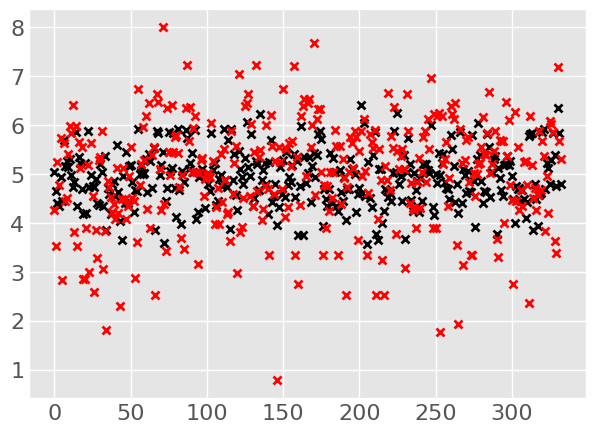

In [17]:
plt.plot(mean, "kx", mew=2)
plt.plot(y_test.to_numpy().reshape(-1,1), "rx", mew=2)

In [18]:
np.sum((mean-y_test.to_numpy().reshape(-1,1))**2)/y_test.to_numpy().shape[0]

0.9297120593174767

In [19]:
np.sum(np.abs(mean-y_test.to_numpy().reshape(-1,1)))/y_test.to_numpy().shape[0]

0.7510586978098621

In [3]:
10**0.7

5.011872336272722

In [ ]:
e = shap.KernelExplainer(m.predict_y, X_train)
shap_values = e.shap_values(X_test)

In [ ]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)